In [1]:
from ultralytics import YOLO
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def blur(f):
    img=cv2.imread(f,cv2.IMREAD_GRAYSCALE)
    l=cv2.Laplacian(img,cv2.CV_64F).var()
    if l>=35:
        return model(f)
    else:
        return print("image is blure")

In [3]:
def model(f):
    model = YOLO(r"C:\Users\dell8\OneDrive\Documents\onedrive\Desktop\folder\project\ppe\weights\ppe2.pt")
    results = model(f)
    counts = {
    'Hardhat': 0,
    'Mask': 0,
    'NO-Hardhat': 0,
    'NO-Mask': 0,
    'NO-Safety Vest': 0,
    'Person': 0,
    'Safety Vest': 0,
    'id card': 0
    }
    for result in results:
        for box in result.boxes:
            cls_idx = int(box.cls) 
            cls_name = model.names[cls_idx] 
            if cls_name in counts:
                counts[cls_name] += 1
    data = [{'Class': cls, 'Count': count} for cls, count in counts.items()]
    df = pd.DataFrame(data)
    return df


In [4]:
def plot_data(df):
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Bar chart for detection counts
    ax1.bar(df['Class'], df['Count'], color='skyblue', label='Detection Count')
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Count')
    ax1.set_title('Object Detection Counts with Total People Overlay')
    ax1.set_xticks(range(len(df['Class'])))
    ax1.set_xticklabels(df['Class'], rotation=45)
    
    # Prepare data for line graph
    gear_classes = ['Hardhat', 'Mask', 'Safety Vest']
    gear_counts = [df.loc[df['Class'] == cls, 'Count'].values[0] for cls in gear_classes]
    total_persons = df.loc[df['Class'] == 'Person', 'Count'].values[0]
    
    # Line graph for comparison with total persons
    ax2 = ax1.twinx()
    ax2.plot(gear_classes, gear_counts, color='green', marker='o', linestyle='-', label='Wearing Gear')
    ax2.plot(gear_classes, [total_persons] * len(gear_classes), color='red', marker='x', linestyle='--', label='Total Persons')
    ax2.set_ylabel('Number of People')
    
    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper right')
    
    plt.show()

In [31]:
f=r"C:\Users\dell8\OneDrive\Documents\onedrive\Desktop\1.jpg"
df=blur(f)
df



image 1/1 C:\Users\dell8\OneDrive\Documents\onedrive\Desktop\1.jpg: 544x640 2 Glovess, 2 Hardhats, 2 NO-Hardhats, 4 NO-Masks, 2 NO-Safety Vests, 4 Persons, 3 Safety Vests, 5759.4ms
Speed: 12.0ms preprocess, 5759.4ms inference, 4.9ms postprocess per image at shape (1, 3, 544, 640)


,Class,Count
0,Hardhat,2
1,Mask,0
2,NO-Hardhat,2
3,NO-Mask,4
4,NO-Safety Vest,2
5,Person,4
6,Safety Vest,3
7,id card,0


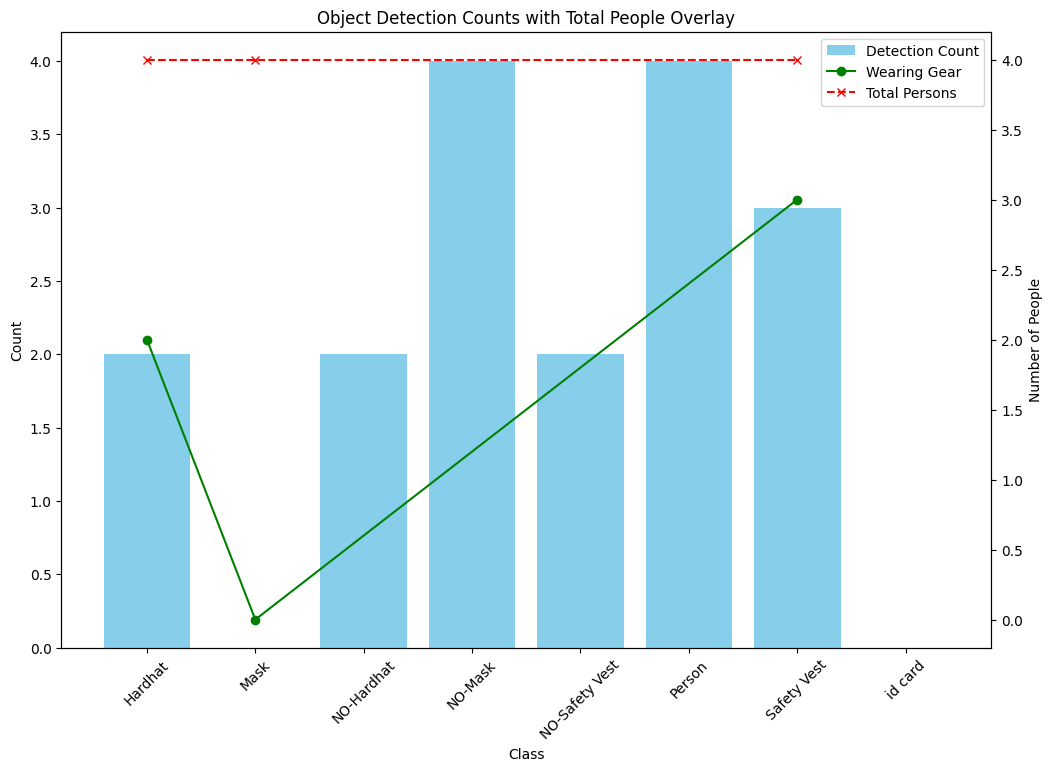

In [25]:
plot_data(df)